# Using Machine Learning to Predict the Quality of Wine

### 送给亲爱的张静全教授，王睿勐 写 

鉴赏酒类的品质是一个极富技术挑战性的工作。酒类的品质自然和其化学组成相关。我们测定了产自葡萄牙波尔图地区的一批酒类的化学组乘（如fixed acidity，volatile acidity，pH等），并且安排著名的鉴酒大师给这些酒打分。

我们的目标是，在未来，可以直接通过酒类的化学组成预测酒类的品质。

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

red_wine=pd.read_csv("C:/Users/wrm/Desktop/wine-quality/winequality-red.csv")
white_wine=pd.read_csv("C:/Users/wrm/Desktop/wine-quality/winequality-white.csv")
print (red_wine.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

上方的print (red_wine.head())命令可以输出red_wine EXCEL 表格的最上六行。可以用这个命令了解这一数据组的概况。
下方，我们可以用red_wine.info()命令，了解这一数据组的基本情况

In [2]:
print (red_wine.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None


从中我们可以看到，整个数据表有12列，每列都有1599行数据，且每列数据都是无损的。数据的类型有可能是float（浮点数）也有可能是int（整数）。整个数据组的存储一共用了150.0KB的内存。

## 现在，我们对这些数据进行可视化处理（画图表示） 

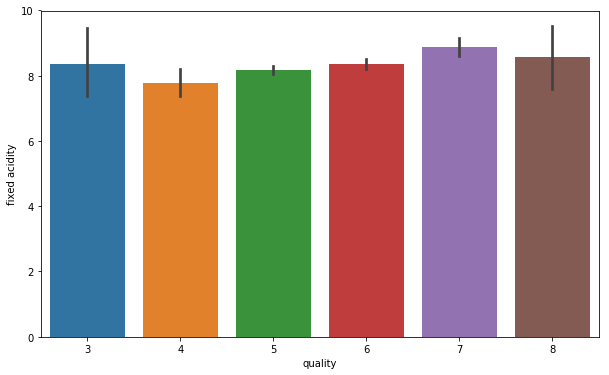

In [3]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = red_wine)

从上图我们可以看出，不同品质的葡萄酒（评分以此为3，4，5，6，7，8）的fixed acidity的均值以及方差。我们可以看出，各种品质的酒fixed acidity区别不大。

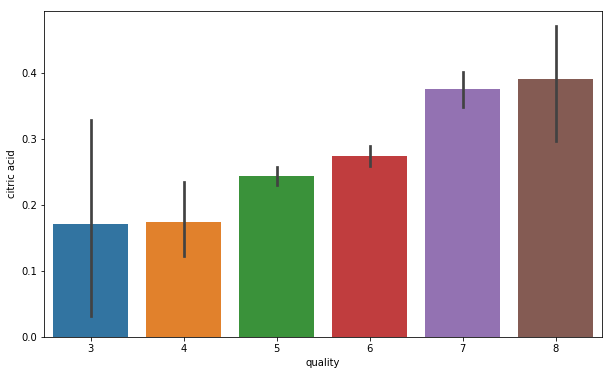

In [4]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = red_wine)

对于上图，我们发现，不同品质的葡萄酒，其citric acid具有巨大的差别。这也提示我们，作为一个变量，citric acid可能比fixed acidity更为重要。由于篇幅的原因，我们略去其他的数据可视化操作。

## 机器学习部分 

在这里我们首先使用机器学习算法random forest进行学习。之后我们采用grid_search的方法从中选取最佳的参数。

In [5]:
X=red_wine.drop(columns=["quality"])
y=red_wine["quality"]
#print (x.head())
#print (y.head())

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()
clf.fit(X_train,y_train)
y_predict=clf.predict(X_test)
#print (y_predict)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print (classification_report(y_predict,y_test))
print (accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         0
           5       0.76      0.70      0.73       237
           6       0.66      0.59      0.63       237
           7       0.41      0.58      0.48        50
           8       0.14      0.33      0.20         3

   micro avg       0.64      0.64      0.64       528
   macro avg       0.33      0.37      0.34       528
weighted avg       0.68      0.64      0.65       528

0.6363636363636364


F:\anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


我们发现，仅仅在数据的基础上采用random forest方法，就可以得到63%的准确率。在其他几次实验中我们曾经得到67%的准确率。这一结果已经远远好于随即猜测（只有16.66%的准确率）。现在，采用grid_search的方法，我们来尝试找出一个最好的参数用于实验。

In [12]:
from sklearn.model_selection import GridSearchCV
from sklearn.datasets import make_classification

rfc = RandomForestClassifier(n_jobs=-1,max_features= 'sqrt' ,n_estimators=50, oob_score = True) 

param_grid = { 
    'n_estimators': [200,300,400,500,600, 700, 800],
    'max_features': ['auto', 'sqrt', 'log2']
}

CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
print (CV_rfc.best_params_)

F:\anaconda2\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


{'max_features': 'auto', 'n_estimators': 200}


In [19]:
rfc_final = RandomForestClassifier(n_jobs=-1,max_features= 'auto' ,n_estimators=200, oob_score = True) 

rfc_final.fit(X_train,y_train)
y_predict=rfc_final.predict(X_test)
#print (y_predict)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print (classification_report(y_predict,y_test))
print (accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.00      0.00      0.00         0
           5       0.76      0.73      0.74       226
           6       0.72      0.61      0.66       251
           7       0.39      0.55      0.45        49
           8       0.14      0.50      0.22         2

   micro avg       0.65      0.65      0.65       528
   macro avg       0.33      0.40      0.35       528
weighted avg       0.70      0.65      0.67       528

0.6534090909090909


F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


有一定的提升，但是并不是非常的明显

我们可以以此获得最好的参数。但是实际运行，速度会比较慢。建议调好参数以后，尽量都按照这些参数进行处理。和我们做薄膜开发的套路差不多。调好参数，情况不变化，那就记录好，以后接着用！笔记功夫要扎实！

采用SGD-Classifier进行这一部分的建模。出于篇幅的考虑，我们不再在这里进行选参的工作。

In [14]:
from sklearn.linear_model import SGDClassifier

sgd=RandomForestClassifier()
sgd.fit(X_train,y_train)
y_predict=sgd.predict(X_test)
#print (y_predict)

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
print (classification_report(y_predict,y_test))
print (accuracy_score(y_predict,y_test))

              precision    recall  f1-score   support

           3       0.00      0.00      0.00         0
           4       0.11      0.50      0.17         4
           5       0.81      0.69      0.74       253
           6       0.63      0.61      0.62       223
           7       0.36      0.53      0.43        47
           8       0.00      0.00      0.00         1

   micro avg       0.64      0.64      0.64       528
   macro avg       0.32      0.39      0.33       528
weighted avg       0.69      0.64      0.66       528

0.6382575757575758


F:\anaconda2\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
F:\anaconda2\lib\site-packages\sklearn\metrics\classification.py:1145: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


在实验结束之后我们发现，使用SGD不选参其准确率也是在60%左右，具有一定的效果。